In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from acquisition_utils import AcquisitionManager, acquisition_cell, save_acquisition, load_acquisition, AcquisitionLoop
AcquisitionManager.data_directory = './data'

## Saving data from a cell

In [3]:
%%acquisition_cell saving_sine

import numpy as np

x = np.linspace(0, 10*np.pi, 101)
y = np.sin(x)

BEWARE: ongoing acquisition was not saved yet!


In [4]:
save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
# in fact, the kernell could have been restarted in the meantime (as long as x and y are retrieved somehow)

saving to h5 ./data\saving_sine\2022-11-30_19-36-32_saving_sine.h5


## Retrieve data automatically from last acquisition cell

saving fig ./data\saving_sine\2022-11-30_19-36-32_saving_sine_FIG1.pdf


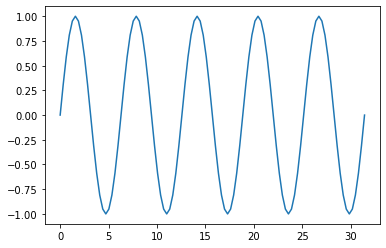

In [5]:
%%analysis_cell
from pylab import *

data = load_acquisition()
fig = plt.figure()
plt.plot(data.x, data.y)

data.save_fig(fig)

## Retrieve data from old acquisition

saving fig ./old_data_example_FIG1.pdf


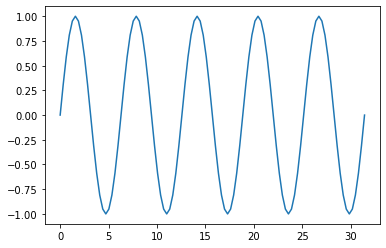

In [6]:
%%analysis_cell ./old_data_example.h5

data = load_acquisition()

fig = plt.figure()
plt.plot(data.x, data.y)

data.save_fig(fig)

## Perform loop transparently

### Single-stage loop

In [6]:
%%acquisition_cell loop_simple
POINTS = 101
freqs = np.linspace(0, 0.4, 10)

def acquire_sine(freq, points):
    x = np.linspace(0, 10*np.pi, points)
    y = np.sin(freq*2*np.pi*x)
    return x, y

loop = AcquisitionLoop()
for freq in loop(freqs):    
    x, y = acquire_sine(freq, POINTS)
    loop.append_data(y=y, freq=freq)
    loop.append_data(x=x, axis=-1)


    save_acquisition(loop_freq=loop)

saving to h5 ./data\loop_simple\2022-09-22_14-10-12_loop_simple.h5


saving fig ./data\loop_simple\2022-09-22_14-10-12_loop_simple_FIG_superimposed.pdf
saving fig ./data\loop_simple\2022-09-22_14-10-12_loop_simple_FIG_color_plot.pdf


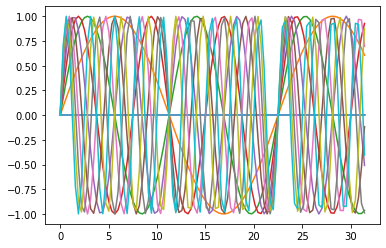

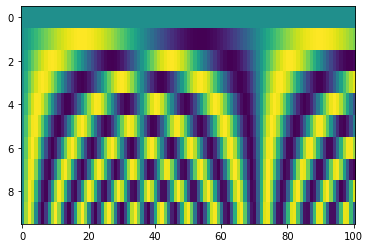

In [7]:
%%analysis_cell

data = load_acquisition()

fig = plt.figure()
for dat in data.loop_freq: # access data in a sequential way (individual AnalysiData objects)
    plt.plot(dat.x, dat.y)
data.save_fig(fig, 'superimposed')

fig = plt.figure()
# access all loop data as a multi-dimensional array:
plt.imshow(data.loop_freq.data['y'], aspect='auto')

data.save_fig(fig, 'color_plot')

### Multi-stage loops

In [7]:
%%acquisition_cell loop_double
POINTS = 101
freqs = np.linspace(0, 0.4, 10)
taus = np.linspace(0, 0.3, 5)

def acquire_sine(freq, points, tau):
    x = np.linspace(0, 10*np.pi, points)
    y = np.sin(freq*2*np.pi*x)
    y*=np.exp(-x*tau)
    return x, y

loop = AcquisitionLoop()

for tau in loop(taus): # len = 5
    loop.append_data(tau=tau)
    for freq in loop(freqs): # len = 10  
        x, y = acquire_sine(freq, POINTS, tau)
        loop.append_data(y=y, freq=freq)
    loop.append_data(x=x)
    save_acquisition(loop_tau_freq=loop)

ValueError: cannot reshape array of size 25962050 into shape (5,10,101)

In [15]:
np.array(loop._data_flatten['x'])

array([[ 0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
         1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339,
         3.14159265,  3.45575192,  3.76991118,  4.08407045,  4.39822972,
         4.71238898,  5.02654825,  5.34070751,  5.65486678,  5.96902604,
         6.28318531,  6.59734457,  6.91150384,  7.2256631 ,  7.53982237,
         7.85398163,  8.1681409 ,  8.48230016,  8.79645943,  9.1106187 ,
         9.42477796,  9.73893723, 10.05309649, 10.36725576, 10.68141502,
        10.99557429, 11.30973355, 11.62389282, 11.93805208, 12.25221135,
        12.56637061, 12.88052988, 13.19468915, 13.50884841, 13.82300768,
        14.13716694, 14.45132621, 14.76548547, 15.07964474, 15.393804  ,
        15.70796327, 16.02212253, 16.3362818 , 16.65044106, 16.96460033,
        17.27875959, 17.59291886, 17.90707813, 18.22123739, 18.53539666,
        18.84955592, 19.16371519, 19.47787445, 19.79203372, 20.10619298,
        20.42035225, 20.73451151, 21.04867078, 21.3

In [17]:
loop._reshape_tuple('x')

[5, 1, 101]

In [23]:
a = [1, 2, 3, 4, 5]

np.pad(a, 3)

array([0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0])

In [10]:
loop._reshape_tuple("tau")

[5, 1]

In [11]:
loop._reshape_tuple("x")

[1, 1, 101]

In [21]:
data.loop_tau_freq.data

{'freq': array([[0.        , 0.04444444, 0.08888889, 0.13333333, 0.17777778,
         0.22222222, 0.26666667, 0.31111111, 0.35555556, 0.4       ],
        [0.        , 0.04444444, 0.08888889, 0.13333333, 0.17777778,
         0.22222222, 0.26666667, 0.31111111, 0.35555556, 0.4       ],
        [0.        , 0.04444444, 0.08888889, 0.13333333, 0.17777778,
         0.22222222, 0.26666667, 0.31111111, 0.35555556, 0.4       ],
        [0.        , 0.04444444, 0.08888889, 0.13333333, 0.17777778,
         0.22222222, 0.26666667, 0.31111111, 0.35555556, 0.4       ],
        [0.        , 0.04444444, 0.08888889, 0.13333333, 0.17777778,
         0.22222222, 0.26666667, 0.31111111, 0.35555556, 0.4       ]]),
 'tau': array([[0.   ],
        [0.075],
        [0.15 ],
        [0.225],
        [0.3  ]]),
 'x': array([[[ 0.        ,  0.31415927,  0.62831853,  0.9424778 ,
           1.25663706,  1.57079633,  1.88495559,  2.19911486,
           2.51327412,  2.82743339,  3.14159265,  3.45575192,
          

<ipython-input-12-0c9d1a3d78e3>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])
<ipython-input-12-0c9d1a3d78e3>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])


saving fig ./data\loop_double\2022-11-30_19-09-59_loop_double_FIG_tau=0.0.pdf
saving fig ./data\loop_double\2022-11-30_19-09-59_loop_double_FIG_tau=0.075.pdf


<ipython-input-12-0c9d1a3d78e3>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])


saving fig ./data\loop_double\2022-11-30_19-09-59_loop_double_FIG_tau=0.15.pdf


<ipython-input-12-0c9d1a3d78e3>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])


saving fig ./data\loop_double\2022-11-30_19-09-59_loop_double_FIG_tau=0.22499999999999998.pdf


<ipython-input-12-0c9d1a3d78e3>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])


saving fig ./data\loop_double\2022-11-30_19-09-59_loop_double_FIG_tau=0.3.pdf
saving fig ./data\loop_double\2022-11-30_19-09-59_loop_double_FIG_1d.pdf


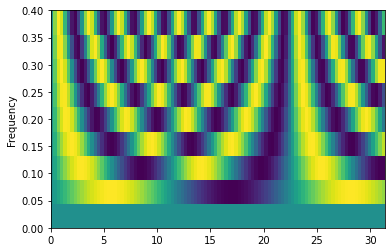

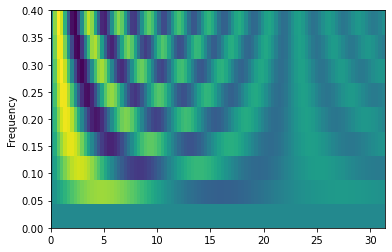

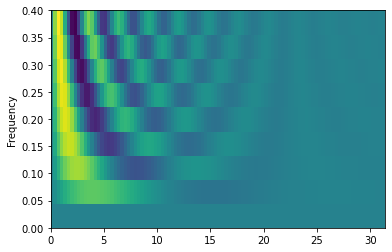

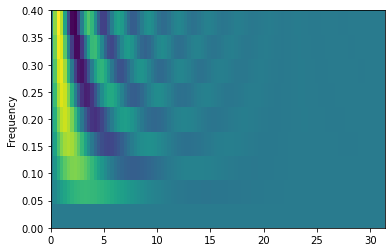

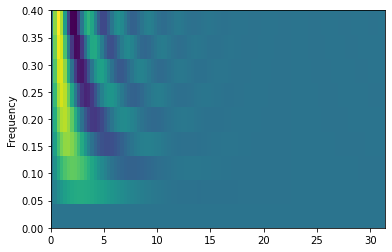

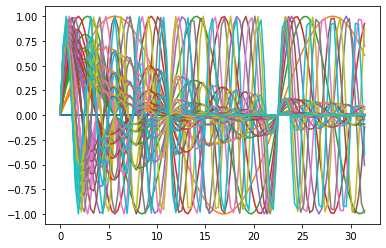

In [12]:
%%analysis_cell

data = load_acquisition()
fig2d = [None]*data.loop_tau_freq.loop_shape[0]
fig1d = plt.figure('1d')


for index, freq_series in enumerate(data.loop_tau_freq):
    fig2d[index] = plt.figure(f"2D-graph_{freq_series.data['tau']}")
    plt.pcolor(freq_series.data['x'], freq_series.data['freq'], freq_series.data['y'])
    data.save_fig(fig2d[index], name=f"tau={freq_series.data['tau'][0]}")
    plt.ylabel('Frequency')
    for dat in freq_series:
        plt.figure('1d')
        plt.plot(dat.x, dat.y)
data.save_fig(fig1d, name='1d')